# Đồ án cuối kì Lập trình cho khoa học dữ liệu


## Thành viên nhóm


| |Họ và tên|MSSV|
|:--:|:--|:--:|
|1|Võ Thành Nam|19120301|
|2|Phạm Lưu Mỹ Phúc|19120331|

## Môi trường code

In [1]:
import sys
sys.executable

'C:\\Users\\Nam\\anaconda3\\envs\\min_ds-env\\python.exe'

## Tổng quan về dữ liệu sẽ được dùng để phân tích

Bộ dữ liệu được sử dụng là file `DataScientist.csv`. Đây là dữ liệu nằm trong một bộ dữ liệu gồm nhiều file khác về thông tin tuyển dụng của những ngành nghề liên quan đến Data. 
- Bộ dữ liệu được tác giả *picklesueat* lấy từ trang web https://www.glassdoor.com/ (một trang web tìm kiếm việc làm), sử dụng công cụ `selenium`. 
- Bộ dữ liệu đã được tác giả public tại [Github](https://github.com/picklesueat/data_jobs_data) và được reup tại [Kaggle](https://www.kaggle.com/andrewmvd/data-scientist-jobs).
- Về license của dữ liệu, tác giả không đề cập cụ thể mà cho phép mọi người có thể tải xuống tùy ý.
- File dữ liệu `DataScientist.csv` là file dữ liệu về thông tin tuyển dụng của nghề Data Scientist bao gồm tên vị trí tuyển dụng, mức lương, tên công ty,...

## Import các thư viện cần thiết

In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import math 

## Khám phá dữ liệu

### Đọc dữ liệu vào từ file csv vào dataframe

In [3]:
ds_df = pd.read_csv('DataScientist.csv')
ds_df.head()

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1
1,1,1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1
2,2,2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True
3,3,3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1
4,4,4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1


Đầu tiên, ta thấy dữ liệu có đến 2 cột index, ta sẽ không sử dụng 2 cột này, do đó sẽ loại bỏ 2 cột này đi.

In [4]:
ds_df.drop(columns = ['Unnamed: 0','index'],inplace = True)
ds_df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1
1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1
2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True
3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1
4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1


### Số lượng dòng và cột của dữ liệu

In [5]:
n_rows = ds_df.shape[0]
n_cols = ds_df.shape[1]
print(f'Number of rows: {n_rows}')
print(f'Number of columns: {n_cols}')

Number of rows: 3909
Number of columns: 15


### Xét xem các dữ liệu có trùng nhau hay không

In [6]:
print(f'Number of duplicated rows: {sum(ds_df.duplicated())}')

Number of duplicated rows: 0


### Ý nghĩa của các cột trong dataframe
(Dựa theo mô tả tại trang web [Kaggle](https://www.kaggle.com/andrewmvd/data-scientist-jobs))

- Job Title: tên vị trí tuyển dụng.
- Salary Estimate: mức lương dự kiến.
- Job Description: mô tả công việc.
- Rating: điểm đánh giá.
- Company Name: tên công ty.
- Location: địa điểm làm việc.
- Headquarters: trụ sở công ty.
- Size: kích thước công ty (số lượng nhân viên).
- Founded: năm thành lập công ty.
- Type of ownership: loại hình sở hữu của công ty.
- Industry: phân loại ngành của công ty.
- Sector: lĩnh vực của công ty.
- Revenue: doanh thu của công ty (theo năm).
- Competitors: công ty đối thủ.
- Easy Apply: công ty có dễ apply hay không.

### Sơ lược về dữ liệu trong các cột

In [7]:
ds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3909 entries, 0 to 3908
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          3909 non-null   object 
 1   Salary Estimate    3909 non-null   object 
 2   Job Description    3909 non-null   object 
 3   Rating             3909 non-null   float64
 4   Company Name       3909 non-null   object 
 5   Location           3909 non-null   object 
 6   Headquarters       3909 non-null   object 
 7   Size               3909 non-null   object 
 8   Founded            3909 non-null   int64  
 9   Type of ownership  3909 non-null   object 
 10  Industry           3909 non-null   object 
 11  Sector             3909 non-null   object 
 12  Revenue            3909 non-null   object 
 13  Competitors        3909 non-null   object 
 14  Easy Apply         3909 non-null   object 
dtypes: float64(1), int64(1), object(13)
memory usage: 458.2+ KB


### Nhận xét chung

- Như ta có thể thấy, dữ liệu không có bất kì dòng nào thiếu hay trùng lắp. Tuy nhiên, khi quan sát bảng dữ liệu ở phía trên, có thế thấy tác giả đã thay thế các dữ liệu (có thể là bị thiếu) bằng giá trị -1.
- Những cột đáng lẽ cần phải ở kiểu dữ liệu là số như `Salary Estimate`, `Size` thì lại có kiểu dữ liệu là object, ta cần phải xử lí những cột này.
- Cột `Company Name` có vẻ bị lỗi khi thu thập dữ liệu (tên công ty gắn liền với rating)
- Cột `Easy Apply` chỉ nên có giá trị `True` hoặc `False`.
- ...
Ta không quan sát được toàn bộ dữ liệu, do đó, ta sẽ phân tích và tiền xử lí cho từng cột trong phần tiền xử lí dữ liệu.

## Tiền xử lí dữ liệu

### Các giá trị của cột Job Title liệu đã đúng hay chưa?

Trước tiên, ta quan sát 20 giá trị xuất hiện nhiều nhất và ít nhất 

In [8]:
job_title_first_20 = ds_df['Job Title'].value_counts()[:20].reset_index()
job_title_last_20 = ds_df['Job Title'].value_counts()[-20:].reset_index()
pd.concat([job_title_first_20,job_title_last_20],axis=1).rename(columns = {'Job Title':'count','index':'Job Title'})

,Job Title,count,Job Title,count
0,Data Scientist,274,Sr Applied Scientist,1
1,Data Engineer,260,Guidewire Data Analyst,1
2,Data Analyst,246,Research Scientist - Data Science (Earth & Atm...,1
3,Senior Data Scientist,91,"Strategic Data Scientist, Data & Technology",1
4,Machine Learning Engineer,47,Lead Process Development Scientist - Upstream,1
5,Senior Data Analyst,47,"Big Data Engineer/Lead/Architect - Austin, TX",1
6,Big Data Engineer,41,"Senior Data Analyst, Sales",1
7,Business Intelligence Analyst,39,Data Science Software Engineer,1
8,Senior Data Engineer,37,Associate Scientist ( Immuno-Oncology),1
9,Sr. Data Scientist,23,"Senior Scientist, Molecular Diagnostics",1


Có thể thấy, thông tin Job Title được miêu tả khá "lộn xộn" có thể là: tuyển nhiều vị trí cùng lúc, ghi tên vị trí cùng thời gian làm việc. Do đó, ta sẽ xử lý để cột chỉ thể hiện một công việc chính (xem việc được nhắc đến đầu tiên là công việc chính). Ngoài ra, có vài vị trí là như nhau nhưng sử dụng thuật ngữ khác nhau (Sr., Senior) ta sẽ xử lý những giá trị này để chúng thể hiện cùng từ ngữ

In [9]:
ds_df['Job Title'] = ds_df['Job Title'].apply(lambda x:''.join(re.compile("[,\/-]").split(x)[:1]))
ds_df['Job Title'].value_counts()

Data Scientist                                                357
Data Engineer                                                 290
Data Analyst                                                  278
Senior Data Scientist                                         105
Data Scientist                                                 70
                                                             ... 
Data Scientist — Risk                                           1
Senior Business Intelligence Data Analyst                       1
Senior Research Scientist Specializing in Machine Learning      1
San Antonio Data Science Tutor Jobs                             1
Machine Learning Engineer (OH)                                  1
Name: Job Title, Length: 1378, dtype: int64

In [10]:
ds_df['Job Title'] = ds_df['Job Title'].str.replace('Sr.','Senior',regex=False)
ds_df['Job Title'] = ds_df['Job Title'].str.replace('Jr.','Junior',regex=False)

### Tiền xử lý cột Salary Estimate


Cột này bao gồm các giá trị là khoảng ước tính, do đó ta sẽ tách thành 2 cột min và max.

In [11]:
def split_to_minmax(s):
    value_range = [int(d) for d in re.findall(r'\d+',s)]
    return value_range
ds_df[['SalaryMin','SalaryMax']] = pd.DataFrame(ds_df['Salary Estimate'].apply(split_to_minmax).to_list())
ds_df.drop(columns=['Salary Estimate'],inplace = True)

### Tiền xử lý cột Rating

In [12]:
ds_df['Rating'].value_counts()

-1.0    409
 3.9    302
 3.7    290
 4.1    272
 3.6    252
 3.8    238
 4.0    200
 3.4    185
 3.5    176
 5.0    160
 3.3    154
 4.2    154
 3.2    136
 4.3    119
 3.1    113
 4.5    108
 4.4     76
 4.6     74
 3.0     65
 2.9     63
 4.7     59
 2.8     58
 4.9     45
 4.8     42
 2.5     33
 2.7     29
 2.6     27
 2.4     20
 1.0     10
 2.3     10
 2.2      9
 1.6      9
 2.0      4
 2.1      3
 1.9      3
 1.7      1
 1.5      1
Name: Rating, dtype: int64

Cột `Rating` có khá nhiều giá trị thiếu được đánh dấu bằng giá trị `-1`. Ta sẽ thay thế các giá trị này bằng trung bình của các giá trị còn lại.

In [13]:
ds_df['Rating'].replace(-1,np.nan,inplace = True)
mean = ds_df['Rating'].mean(skipna = True).round(1)
ds_df['Rating'].replace(np.nan,mean,inplace = True)

### Loại bỏ rating trong Company name

Như đã nói ở phần Khám phá dữ liệu, cột `Company Name` đã bị lỗi khi thu thập dữ liệu (tên công ty gắn liền với rating). Vì đã có cột `Rating` nên ta sẽ thực hiện xóa phần rating bị thừa trong cột này.

In [14]:
ds_df['Company Name'] = ds_df['Company Name'].apply(lambda x:x.split('\n')[0])

### Tiền xử lý cột Location và loại bỏ missing value

In [15]:
ds_df['Location'].replace('-1',np.nan,inplace = True)

In [16]:
ds_df['Location'].value_counts()

Austin, TX             345
Chicago, IL            330
San Diego, CA          304
New York, NY           303
Houston, TX            219
                      ... 
Lyndhurst, NJ            1
Summit, NJ               1
Gloucester City, NJ      1
Hines, IL                1
Hilliard, OH             1
Name: Location, Length: 191, dtype: int64

Trong cột `Location`, mỗi giá trị bao gồm tên thành phố và tên bang cách nhau bởi dấu `,`. Ta sẽ tách các giá trị này thành 2 cột là `City` và `State`.

In [17]:
ds_df[['City','State']] = ds_df['Location'].str.split(', ',expand=True)
ds_df.drop(columns = ['Location'], inplace = True)

### Tách tên thành phố trong cột Headquarters và xử lý missing value

In [18]:
ds_df['Headquarters'].replace('-1',np.nan,inplace = True)


In [19]:
headquarters_splited = ds_df['Headquarters'].str.split(',',expand=True)
headquarters_splited

,0,1,2
0,Montreal,Canada,None
1,New York,NY,None
2,New York,NY,None
3,Lyndhurst,NJ,None
4,New York,NY,None
...,...,...,...
3904,Irving,TX,None
3905,Woodridge,IL,None
3906,Irving,TX,None
3907,Omaha,NE,None


Một số công ty có định dạng `Headquarters` khác với công ty còn lại, ta sẽ xem xét và giải quyết các gái trị đặc biệt này.

In [20]:
headquarters_splited[~headquarters_splited[2].isnull()]

,0,1,2
142,New York,NY (US),NY
303,New York,NY (US),NY
1686,Philadelphia,PA (US),PA
1751,Philadelphia,PA (US),PA
1816,New York,NY (US),NY
2118,San Marcos,CA (US),CA


Như vậy, các định dạng khác thường là do một số công ty ghi thêm quốc gia, ta sẽ loại bỏ các giá trị này.

In [21]:
headquarters_splited[1] = headquarters_splited[1].str.replace('\(\w*\)','',regex=True)
headquarters_splited[1] = headquarters_splited[1].str.strip()
headquarters_splited.drop(columns=[2],inplace=True)

In [22]:
ds_df[['Headquarters_City','Headquarters_State/Country']] = headquarters_splited
ds_df.drop(columns=['Headquarters'],inplace = True)

### Tiền xử lý cột Size

In [23]:
ds_df['Size'].value_counts()

10000+ employees           993
51 to 200 employees        563
1001 to 5000 employees     553
1 to 50 employees          550
201 to 500 employees       418
501 to 1000 employees      307
-1                         229
5001 to 10000 employees    219
Unknown                     77
Name: Size, dtype: int64

Cột `Size` gồm 3 kiểu thể hiện dữ liệu: gồm `-1` cho các giá trị thiếu, `Unknown` là các giá trị mà công ty không cung cấp và còn lại là các khoảng. Ta sẽ tiền xử lí cột này như sau:
* Các giá trị `-1` và `Unknown` sẽ thay thế bằng giá trị `NaN`.
* Các giá trị là các khoảng, ta sẽ chuyển thành giá trị trung bình, riêng khoảng lớn nhất sẽ dùng giá trị phân chia.

In [24]:
def convert_to_mean(s):
    if type(s) != str:
        return
    value_range = [int(d) for d in re.findall(r'\d+',s)]
    return math.floor(sum(value_range)/len(value_range))
ds_df['Size'].replace('-1',np.nan,inplace = True)
ds_df['Size'].replace('Unknown',np.nan,inplace = True)
ds_df['Size']=ds_df['Size'].apply(convert_to_mean)
ds_df['Size'].value_counts()

10000.0    993
125.0      563
3000.0     553
25.0       550
350.0      418
750.0      307
7500.0     219
Name: Size, dtype: int64

### Tiền xử lý cột Founded 

In [25]:
ds_df['Founded'].value_counts().sort_index()

-1       977
 1625      2
 1682      1
 1740      9
 1775     13
        ... 
 2016     49
 2017     40
 2018     27
 2019     14
 2020      1
Name: Founded, Length: 173, dtype: int64

Cột `Founded` có khá nhiều giá trị thiếu, tác giả đã đánh dấu bằng giá trị `-1`. Ta không có cách nào để xác định năm thành lập của những công ty này. Do đó, để tiện cho việc tính toán các tác vụ về sau (tính giá trị thiếu,...), ta sẽ chuyển các giá trị `-1` về `NaN`.

In [26]:
ds_df['Founded'].replace(-1,np.nan,inplace = True)
ds_df['Founded'].unique()

array([2007., 2008.,   nan, 2019., 1985., 1993., 2018., 2000., 2014.,
       2011., 1999., 2001., 1998., 2005., 1943., 2012., 1923., 2003.,
       2002., 2015., 2006., 2010., 1853., 1990., 1914., 2013., 2004.,
       1799., 1935., 1995., 1994., 1988., 1917., 1947., 1981., 1940.,
       1841., 2017., 1896., 2009., 1898., 1968., 1862., 1934., 1992.,
       2016., 1984., 1987., 1966., 1976., 1871., 1625., 1997., 1967.,
       1948., 1913., 1989., 1893., 1904., 1911., 1961., 1806., 1969.,
       1945., 1784., 1857., 1971., 1852., 1922., 1851., 1956., 1906.,
       1973., 1960., 1975., 1982., 1996., 1931., 1986., 1902., 1909.,
       1880., 1946., 1970., 1979., 1977., 1965., 1954., 1850., 1980.,
       1919., 1983., 1888., 1978., 1872., 1831., 1936., 1939., 1937.,
       1928., 1991., 1929., 1944., 1901., 1974., 1925., 1817., 1963.,
       1894., 1890., 1882., 1892., 1908., 1926., 1883., 1845., 1849.,
       1918., 1900., 1889., 1837., 1930., 1877., 1910., 1962., 1955.,
       1897., 1949.,

Quan sát cột `Founded` các giá trị còn lại đều đã chính xác. Kiểu dữ liệu `int64` đã phù hợp với ý nghĩa của cột là năm thành lập công ty.

### Tiền xử lý cột Industry 

In [27]:
ds_df['Industry'].value_counts()

-1                                      546
IT Services                             472
Staffing & Outsourcing                  313
Biotech & Pharmaceuticals               293
Computer Hardware & Software            264
                                       ... 
Beauty & Personal Accessories Stores      1
Truck Rental & Leasing                    1
Metals Brokers                            1
Religious Organizations                   1
Auto Repair & Maintenance                 1
Name: Industry, Length: 96, dtype: int64

Tương tự cột `Founded`, cột `Industry` cũng có các giá trị thiếu được đánh dấu bằng giá trị `-1`. Ta sẽ chuyển giá trị này thành `NaN`.

In [28]:
ds_df['Industry'].replace('-1',np.nan,inplace = True)

### Tiền xử lý cột Revenue 

In [29]:
ds_df["Revenue"].value_counts()

Unknown / Non-Applicable            1163
$10+ billion (USD)                   599
$100 to $500 million (USD)           338
-1                                   229
$50 to $100 million (USD)            214
$2 to $5 billion (USD)               211
$10 to $25 million (USD)             191
$1 to $2 billion (USD)               180
$1 to $5 million (USD)               170
$25 to $50 million (USD)             143
$5 to $10 billion (USD)              133
Less than $1 million (USD)           124
$500 million to $1 billion (USD)     114
$5 to $10 million (USD)              100
Name: Revenue, dtype: int64

Như có thể quan sát, cột này có 3 kiểu thể hiện dữ liệu: giá trị thiếu đánh dấu bằng `-1`, giá trị `Unknown / Non-Applicable` và giá trị có định dạng là một khoảng ước lượng. Ta sẽ tiền xử lí cột này như sau:
* Các dòng có giá trị `-1` hoặc `Unknown / Non-Applicable` sẽ chuyển thành dạng `NaN`.
* Các dòng có giá trị là môt khoảng ước lượng sẽ chuyển thành giá trị trung bình của khoảng. Với 2 khoảng đầu cuối, ta sẽ mặc định thành giá trị phân chia của khoảng đó. Ngoài ra, các giá trị billion cũng sẽ được đổi thành million.

In [30]:
def convert_to_num(s):
    if type(s) != str:
        return
    if re.compile(r'\$\d+\+ billion').match(s):
        value_range = [int(d) for d in re.findall(r'\d+',s)]
        return sum(value_range)/len(value_range)*1000
    elif re.compile(r'\$\d+ to \$\d+ billion').match(s):
        value_range = [int(d) for d in re.findall(r'\d+',s)]
        return sum(value_range)/len(value_range)*1000
    elif re.compile(r'\$\d+ million to \$\d+ billion').match(s):
        match = re.compile(r'\$(\d+) million to \$(\d+) billion').match(s)
        return (int(match.group(1))+int(match.group(2))*1000)/2
    else:
        value_range = [int(d) for d in re.findall(r'\d+',s)]
        return sum(value_range)/len(value_range)
ds_df['Revenue'].replace('-1',np.nan,inplace = True)
ds_df['Revenue'].replace('Unknown / Non-Applicable',np.nan,inplace = True)
ds_df['Revenue'] = ds_df['Revenue'].apply(convert_to_num)

### Tiền xử lý cột Easy Apply

In [31]:
print(ds_df['Easy Apply'].dtype)
ds_df["Easy Apply"].value_counts()

object


-1      3745
True     164
Name: Easy Apply, dtype: int64

Cột `Easy Apply` hiện tại gồm 2 giá trị -1 và True. Vì cung cấp thông tin công ty có dễ apply hay không, cột nên mang giá trị `True` hoặc `False`. Do đó, ta thực hiện replace -1 bằng `False` và chuyển dtype của cột về đúng dạng `bool`

In [32]:
ds_df["Easy Apply"] = ds_df["Easy Apply"].replace('-1', False).astype(bool)

### Tiền xử lý các cột Type of ownership, Sector, Competitors

In [33]:
ds_df['Type of ownership'].unique()

array(['Company - Private', 'Unknown', 'Company - Public',
       'Nonprofit Organization', '-1', 'Government', 'Hospital',
       'Self-employed', 'Subsidiary or Business Segment', 'Contract',
       'School / School District', 'Private Practice / Firm',
       'College / University', 'Franchise', 'Other Organization'],
      dtype=object)

In [34]:
ds_df['Sector'].unique()

array(['Travel & Tourism', 'Consumer Services', '-1',
       'Information Technology', 'Business Services', 'Insurance',
       'Finance', 'Retail', 'Media', 'Restaurants, Bars & Food Services',
       'Agriculture & Forestry', 'Non-Profit', 'Education', 'Government',
       'Health Care', 'Oil, Gas, Energy & Utilities',
       'Accounting & Legal', 'Manufacturing', 'Real Estate',
       'Biotech & Pharmaceuticals', 'Arts, Entertainment & Recreation',
       'Aerospace & Defense', 'Construction, Repair & Maintenance',
       'Transportation & Logistics', 'Telecommunications',
       'Mining & Metals'], dtype=object)

In [35]:
ds_df['Competitors'].value_counts()

-1                                                          2760
Amazon, Accenture, Microsoft                                  61
Google, Microsoft, Samsung Electronics                        60
Google, Microsoft, Walmart                                    47
Google, Microsoft, Apple                                      25
                                                            ... 
ID Business Solutions, Tripos LP                               1
NBCUniversal                                                   1
Northrop Grumman, Raytheon Technologies, Lockheed Martin       1
Birchbox, ipsy, Stitch Fix                                     1
Thomson Reuters, FactSet, Bloomberg L.P.                       1
Name: Competitors, Length: 422, dtype: int64

Quan sát 3 cột này thì có vẻ ở bước tiền xử lý này ta chỉ cần thay thế giá trị `-1` thành giá trị `NaN`

In [36]:
ds_df[['Type of ownership','Sector','Competitors']] = ds_df[['Type of ownership','Sector','Competitors']].replace('-1',np.nan)

### Sau khi thực hiện xử lý các cột, ta kiểm tra lại xem dữ liệu đã có dạng thích hợp hay chưa

In [37]:
ds_df.describe()

,Rating,Size,Founded,Revenue,SalaryMin,SalaryMax
count,3909.000000,3603.000000,2932.000000,2517.000000,3909.000000,3909.000000
mean,3.785802,3800.215099,1972.371419,3261.437823,81.910463,133.825019
std,0.581588,4241.317779,52.719618,4167.295702,34.310710,45.011236
min,1.000000,25.000000,1625.000000,1.000000,10.000000,26.000000
25%,3.500000,125.000000,1961.000000,37.500000,52.000000,97.000000
50%,3.800000,750.000000,1995.000000,300.000000,76.000000,129.000000
75%,4.100000,10000.000000,2006.000000,7500.000000,110.000000,165.000000
max,5.000000,10000.000000,2020.000000,10000.000000,200.000000,254.000000


Quan sát các cột dữ liệu dạng số thì có vẻ không có gì bất thường xuất hiện.

#### Tiếp theo ta kiểm tra xem `dtype` của các cột đã đúng chưa

In [38]:
ds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3909 entries, 0 to 3908
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Job Title                   3909 non-null   object 
 1   Job Description             3909 non-null   object 
 2   Rating                      3909 non-null   float64
 3   Company Name                3909 non-null   object 
 4   Size                        3603 non-null   float64
 5   Founded                     2932 non-null   float64
 6   Type of ownership           3680 non-null   object 
 7   Industry                    3363 non-null   object 
 8   Sector                      3363 non-null   object 
 9   Revenue                     2517 non-null   float64
 10  Competitors                 1149 non-null   object 
 11  Easy Apply                  3909 non-null   bool   
 12  SalaryMin                   3909 non-null   int64  
 13  SalaryMax                   3909 

In [39]:
ds_df

,Job Title,Job Description,Rating,Company Name,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,SalaryMin,SalaryMax,City,State,Headquarters_City,Headquarters_State/Country
0,Senior Data Scientist,"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper,750.0,2007.0,Company - Private,Travel Agencies,Travel & Tourism,NaN,NaN,False,111,181,New York,NY,Montreal,Canada
1,Data Scientist,"At Noom, we use scientifically proven methods ...",4.5,Noom US,3000.0,2008.0,Company - Private,"Health, Beauty, & Fitness",Consumer Services,NaN,NaN,False,111,181,New York,NY,New York,NY
2,Data Science Manager,Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,3.8,Decode_M,25.0,NaN,Unknown,NaN,NaN,NaN,NaN,True,111,181,New York,NY,New York,NY
3,Data Analyst,Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital,350.0,2019.0,Company - Private,Internet,Information Technology,NaN,"Zocdoc, Healthgrades",False,111,181,Lyndhurst,NJ,Lyndhurst,NJ
4,Director,"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group,125.0,2007.0,Company - Private,Advertising & Marketing,Business Services,NaN,"BBDO, Grey Group, Droga5",False,111,181,New York,NY,New York,NY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3904,AWS Data Engineer,About Us\n\nTachyon Technologies is a Digital ...,4.4,Tachyon Technologies,350.0,2011.0,Company - Private,IT Services,Information Technology,17.5,NaN,False,55,112,Dublin,OH,Irving,TX
3905,Data Analyst â Junior,"Job description\nInterpret data, analyze resul...",5.0,"Staffigo Technical Services, LLC",125.0,2008.0,Company - Private,IT Services,Information Technology,75.0,NaN,False,55,112,Columbus,OH,Woodridge,IL
3906,Security Analytics Data Engineer,Job DescriptionThe Security Analytics Data Eng...,3.8,"PDS Tech, Inc.",7500.0,1977.0,Company - Private,Staffing & Outsourcing,Business Services,300.0,NaN,False,55,112,Dublin,OH,Irving,TX
3907,Security Analytics Data Engineer,The Security Analytics Data Engineer will inte...,4.0,Data Resource Technologies,25.0,NaN,Company - Private,Accounting,Accounting & Legal,1.0,NaN,False,55,112,Dublin,OH,Omaha,NE


## Đưa ra các câu hỏi cần trả lời

- **Câu hỏi 1:** Liệu điểm Rating có liên hệ với sự đãi ngộ về mức lương của một công ty hay không?

- Câu 2

- Câu 3

### Câu hỏi 1: Liệu điểm Rating có liên hệ với sự đãi ngộ về mức lương của một công ty hay không?

Việc xem xét Ratings và mức lương sẽ giúp có được cái nhìn về khía cạnh lương thưởng của các công ty trên thị trường tuyển dụng. (Những công ty có điểm Ratings thấp có mức lương như thế nào, có chênh lệch nhiều so với những công ty được đánh giá cao hơn hay không? Những công ty được đánh giá cao thì mức lương đi kèm của họ có thực sự cao hơn không và cao hơn như thế nào?,...)

Đầu tiên, ta thấy điểm `Rating` thường là các số thập phân, do đó ta sẽ thực hiện đánh giá bằng 2 bước:
- **Bước 1:** Gom các `Rating` thành 5 nhóm `(0,1], (1,2], (2,3], (3,4], (4,5]`, sau đó tính số lượng, giá trị min, max, median và mean của các cột SalaryMin, SalaryMax.
- **Bước 2:** Vẽ biểu đồ cột về tương quan giữa mức lương trung bình (của cột `SalaryMin` và `SalaryMax`) và điểm được đánh giá. Vẽ biểu đồ tròn để thấy được tỉ lệ điểm đánh giá giữa các nhóm.

**Bước 1:** Gom nhóm và tính các giá trị thống kê.

In [40]:
tdf = ds_df[['Rating','SalaryMin','SalaryMax']].groupby(pd.cut(ds_df.Rating,[0,1,2,3,4,5]))\
                .agg(['count','min','max','mean','median']).round(2).reset_index()
tdf

Rating                              SalaryMin                         \
          count  min  max  mean median     count min  max   mean median   
0  (0, 1]    10  1.0  1.0  1.00    1.0        10  12  156  87.30     90   
1  (1, 2]    18  1.5  2.0  1.74    1.6        18  45  138  78.67     74   
2  (2, 3]   317  2.1  3.0  2.74    2.8       317  12  156  77.28     74   
3  (3, 4]  2455  3.1  4.0  3.65    3.7      2455  12  200  80.26     75   
4  (4, 5]  1109  4.1  5.0  4.45    4.4      1109  10  200  86.90     84   

  SalaryMax                          
      count min  max    mean median  
0        10  56  254  138.40  120.0  
1        18  78  217  127.94  105.5  
2       317  27  254  126.31  123.0  
3      2455  27  254  132.02  125.0  
4      1109  26  254  140.02  143.0

**Bước 2:** Vẽ biểu đồ để thể hiện các mối liên hệ

AttributeError: module 'matplotlib.pyplot' has no attribute 'pyplot'

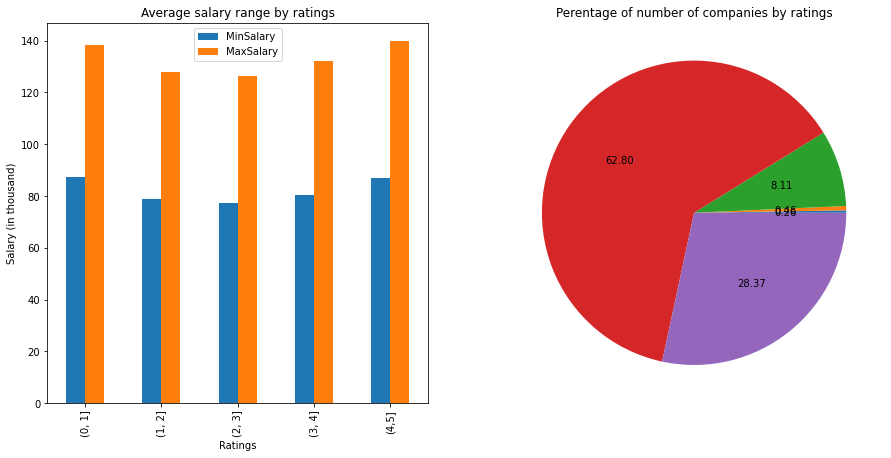

In [44]:
fig, axs = plt.subplots(1, 2)
# Vẽ biểu đồ cột
labels = ['(0, 1]','(1, 2]','(2, 3]','(3, 4]','(4,5]']
sdf = pd.DataFrame()
sdf['MinSalary'] = tdf['SalaryMin']['mean']
sdf['MaxSalary'] = tdf['SalaryMax']['mean']
sdf.index = labels
sdf.plot(ax = axs[0], kind = 'bar', figsize=(15, 7))
axs[0].set_title('Average salary range by ratings')
axs[0].set_xlabel('Ratings')
axs[0].set_ylabel('Salary (in thousand)')
# Vẽ biểu đồ tròn
rdf = tdf['Rating']['count']
rdf.plot(ax = axs[1], kind = 'pie',autopct = '%.2f',figsize=(15, 7),labels = None)
axs[1].set_title('Perentage of number of companies by ratings')
axs[1].set_ylabel('')
plt.legend(title = 'Rating',labels = labels)

fig.suptitle('Salary and percentage of number of companies by ratings')
pltyplot.show()

Như vậy, sau khi vẽ biểu đồ xong, ta có những đánh giá sau:
- Phần lớn các công ty có điểm `Rating` nằm ở mức từ 3 đến 4 điểm, chiếm 62.8%. Tiếp theo là các công ty có điểm `Rating` từ 4 đến 5, chiếm 28.37%. Các công ty có điểm nằm ở các nhóm thấp hơn (dưới 3 điểm) chỉ chiếm tỉ lệ rất nhỏ, chưa tới 10%.
- Những công ty có mức `Rating` cao hơn (trong nhóm từ 2 điểm trở lên) thường có mức đãi ngộ cao hơn về lương (cả mức thấp nhất lẫn mức cao nhất). Những công ty có điểm `Rating` thấp không có nghĩa là mức lương sẽ thấp. Tuy nhiên, chúng ta cũng nên lưu ý rằng lượng công ty có điểm `Rating` thấp chỉ chiếm 1 phần rất nhỏ, gần như không đáng kể so với phần còn lại.
- Mức chênh lệch giữa các cột `SalaryMax` với nhau và các cột `SalaryMin` với nhau là có và khá đáng kể (VD: ở cột SalaryMax thì mức chênh lệch giữa nhóm `(3,4]` và nhóm `(4,5]` là ~8000USD/year).

Ta kết luận được rằng, với các công ty trong tập dữ liệu đang xét, mức lương và `Rating` có mối liên hệ với nhau. Những công ty có điểm `Rating` càng cao thì mức lương sẽ càng cao.

### Câu hỏi 2:

### Câu hỏi 3:

## Tổng kết

## Tài liệu tham khảo